In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

sns.set_style('whitegrid')

## Load Model Predictions and Test Data

In [2]:
# Load predictions from the ConvLSTM model
predictions = np.load('CrimeNYC/data/homo_convlstm.npy')
print(f"Predictions shape: {predictions.shape}")

# Load test data
test_data = np.load('CrimeNYC/data/test_data.npy')
print(f"Test data shape: {test_data.shape}")

# Account for lookback period (7 days)
lookback = 7
test_actual = test_data[lookback:]
test_actual = np.expand_dims(test_actual, -1)
print(f"Test actual shape (aligned): {test_actual.shape}")
print(f"Number of prediction time steps: {len(predictions)}")

Predictions shape: (358, 67, 50, 1)
Test data shape: (365, 67, 50)
Test actual shape (aligned): (358, 67, 50, 1)
Number of prediction time steps: 358


## Performance Metrics

In [3]:
# Calculate overall metrics
mse = mean_squared_error(test_actual.flatten(), predictions.flatten())
mae = mean_absolute_error(test_actual.flatten(), predictions.flatten())
rmse = np.sqrt(mse)

print("=" * 50)
print("Overall Model Performance Metrics")
print("=" * 50)
print(f"Mean Squared Error (MSE):      {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE):      {mae:.6f}")
print("=" * 50)

Overall Model Performance Metrics
Mean Squared Error (MSE):      0.814859
Root Mean Squared Error (RMSE): 0.902695
Mean Absolute Error (MAE):      0.314691


In [4]:
# Calculate metrics over time
mse_scores = []
mae_scores = []
rmse_scores = []

for i in range(len(predictions)):
    mse_t = mean_squared_error(test_actual[i].flatten(), predictions[i].flatten())
    mae_t = mean_absolute_error(test_actual[i].flatten(), predictions[i].flatten())
    rmse_t = np.sqrt(mse_t)
    
    mse_scores.append(mse_t)
    mae_scores.append(mae_t)
    rmse_scores.append(rmse_t)

print(f"Average MSE:  {np.mean(mse_scores):.6f} ± {np.std(mse_scores):.6f}")
print(f"Average MAE:  {np.mean(mae_scores):.6f} ± {np.std(mae_scores):.6f}")
print(f"Average RMSE: {np.mean(rmse_scores):.6f} ± {np.std(rmse_scores):.6f}")

Average MSE:  0.814859 ± 0.260975
Average MAE:  0.314691 ± 0.023776
Average RMSE: 0.895962 ± 0.110050


## Visualization: Prediction vs Actual Comparison

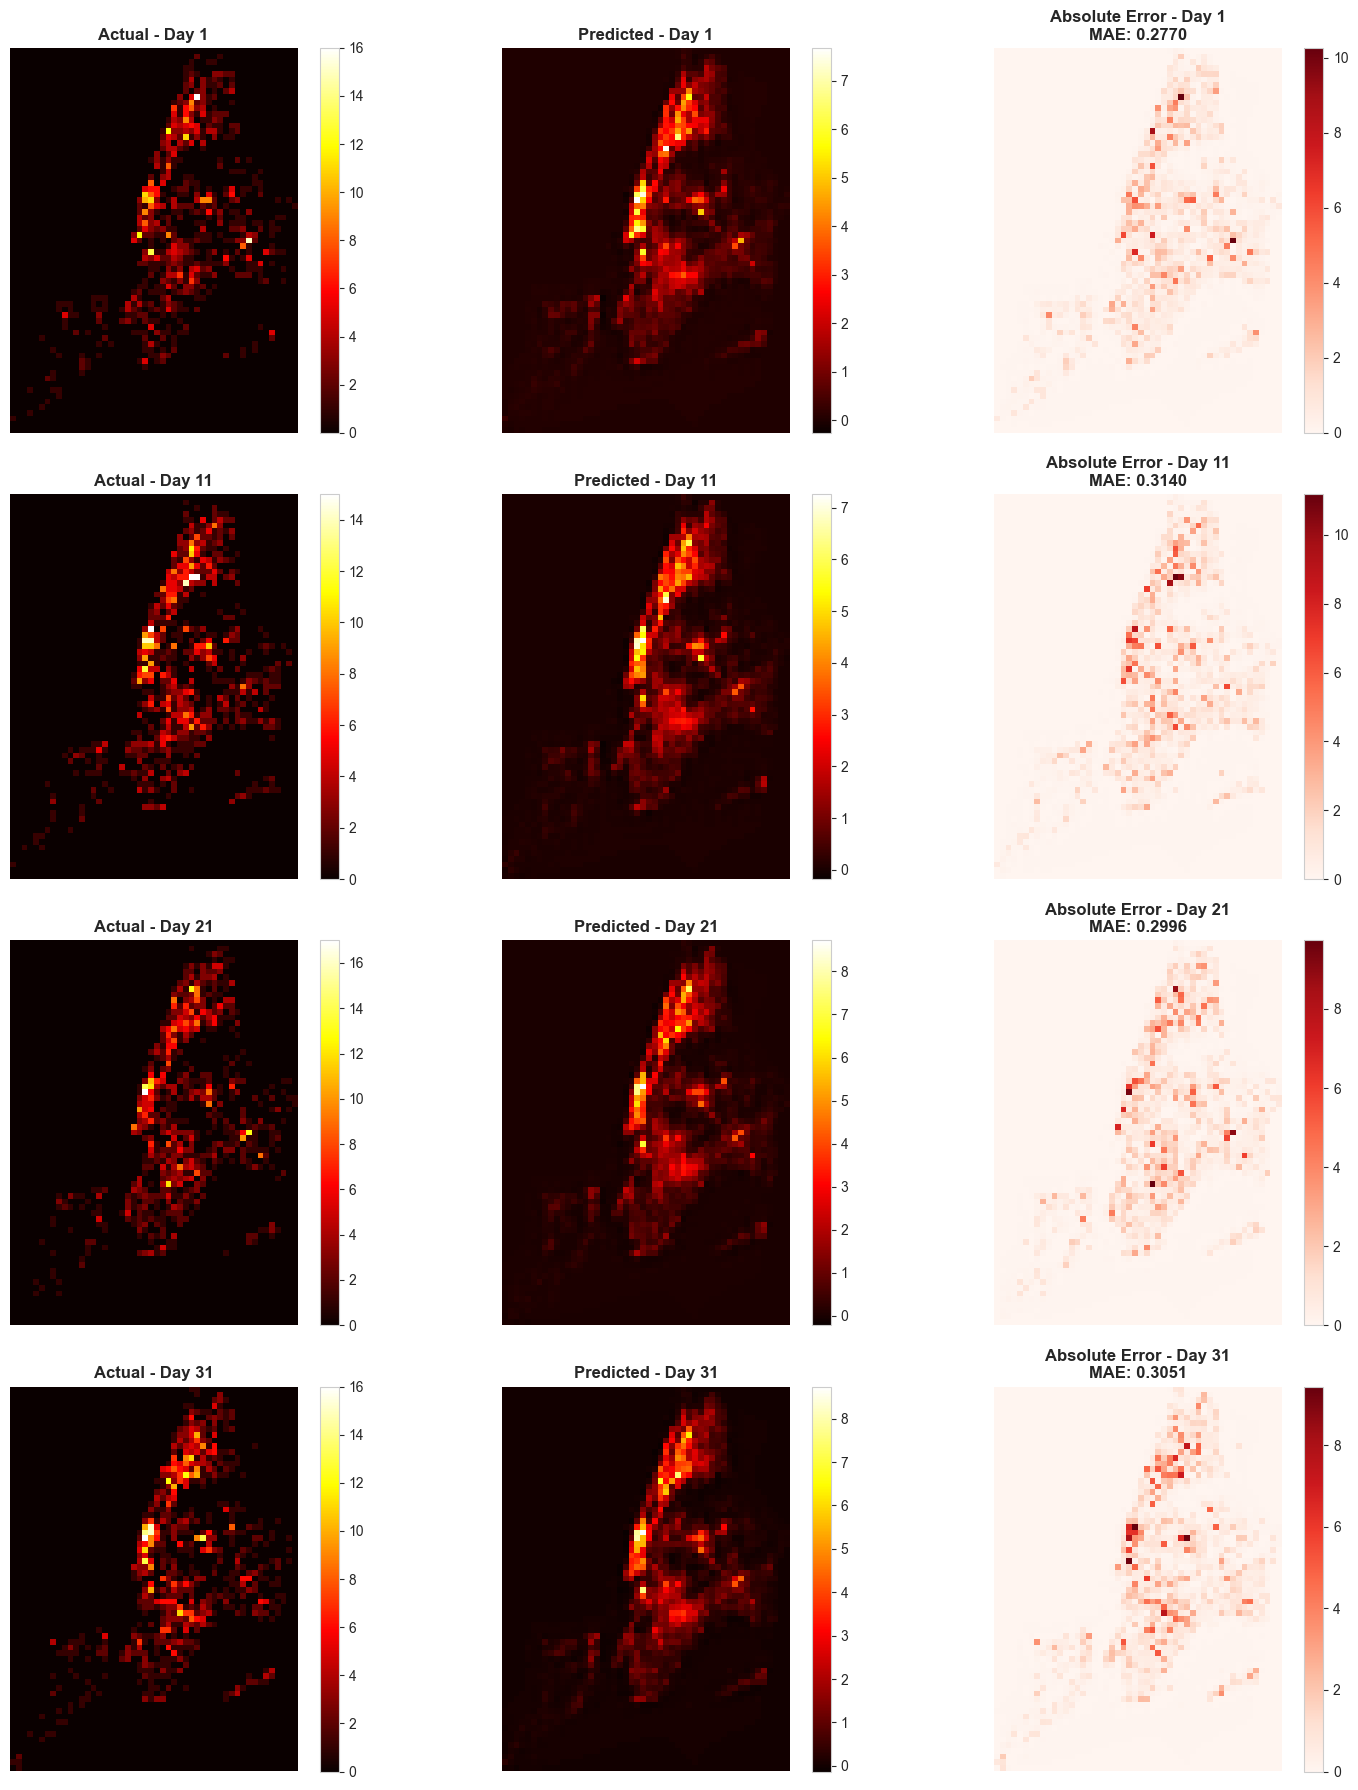

In [5]:
# Visualize predictions vs actual for sample time steps
fig, axes = plt.subplots(4, 3, figsize=(16, 18))

# Show 4 different time steps
sample_indices = [0, 10, 20, 30]

for row, idx in enumerate(sample_indices):
    if idx >= len(predictions):
        break
        
    # Actual values
    im0 = axes[row, 0].imshow(test_actual[idx, :, :, 0], cmap='hot', interpolation='nearest')
    axes[row, 0].set_title(f'Actual - Day {idx+1}', fontsize=12, fontweight='bold')
    axes[row, 0].axis('off')
    plt.colorbar(im0, ax=axes[row, 0], fraction=0.046, pad=0.04)
    
    # Predictions
    im1 = axes[row, 1].imshow(predictions[idx, :, :, 0], cmap='hot', interpolation='nearest')
    axes[row, 1].set_title(f'Predicted - Day {idx+1}', fontsize=12, fontweight='bold')
    axes[row, 1].axis('off')
    plt.colorbar(im1, ax=axes[row, 1], fraction=0.046, pad=0.04)
    
    # Absolute Error
    error = np.abs(test_actual[idx, :, :, 0] - predictions[idx, :, :, 0])
    im2 = axes[row, 2].imshow(error, cmap='Reds', interpolation='nearest')
    axes[row, 2].set_title(f'Absolute Error - Day {idx+1}\nMAE: {np.mean(error):.4f}', 
                           fontsize=12, fontweight='bold')
    axes[row, 2].axis('off')
    plt.colorbar(im2, ax=axes[row, 2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.savefig('CrimeNYC/plots/prediction_vs_actual.png', dpi=150, bbox_inches='tight')
plt.show()

## Error Metrics Over Time

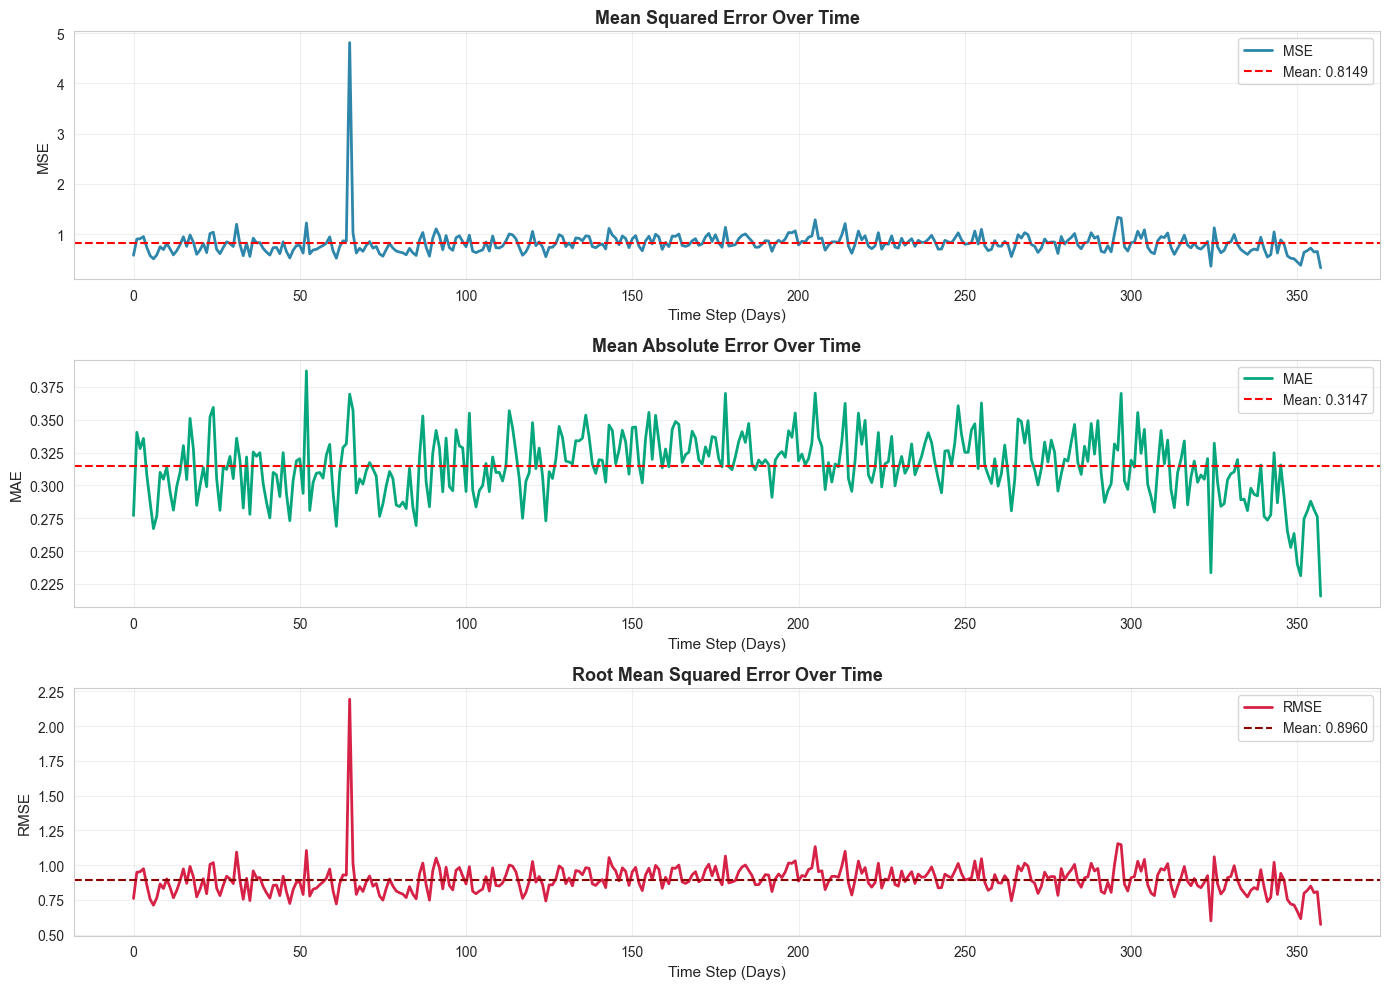

In [6]:
# Plot error metrics evolution
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

axes[0].plot(mse_scores, label='MSE', color='#2E86AB', linewidth=2)
axes[0].axhline(y=np.mean(mse_scores), color='red', linestyle='--', 
                label=f'Mean: {np.mean(mse_scores):.4f}', linewidth=1.5)
axes[0].set_xlabel('Time Step (Days)', fontsize=11)
axes[0].set_ylabel('MSE', fontsize=11)
axes[0].set_title('Mean Squared Error Over Time', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=10)

axes[1].plot(mae_scores, label='MAE', color='#06A77D', linewidth=2)
axes[1].axhline(y=np.mean(mae_scores), color='red', linestyle='--', 
                label=f'Mean: {np.mean(mae_scores):.4f}', linewidth=1.5)
axes[1].set_xlabel('Time Step (Days)', fontsize=11)
axes[1].set_ylabel('MAE', fontsize=11)
axes[1].set_title('Mean Absolute Error Over Time', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)

axes[2].plot(rmse_scores, label='RMSE', color='#D62246', linewidth=2)
axes[2].axhline(y=np.mean(rmse_scores), color='darkred', linestyle='--', 
                label=f'Mean: {np.mean(rmse_scores):.4f}', linewidth=1.5)
axes[2].set_xlabel('Time Step (Days)', fontsize=11)
axes[2].set_ylabel('RMSE', fontsize=11)
axes[2].set_title('Root Mean Squared Error Over Time', fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].legend(fontsize=10)

plt.tight_layout()
plt.savefig('CrimeNYC/plots/error_metrics_timeline.png', dpi=150, bbox_inches='tight')
plt.show()

## Spatial Error Analysis

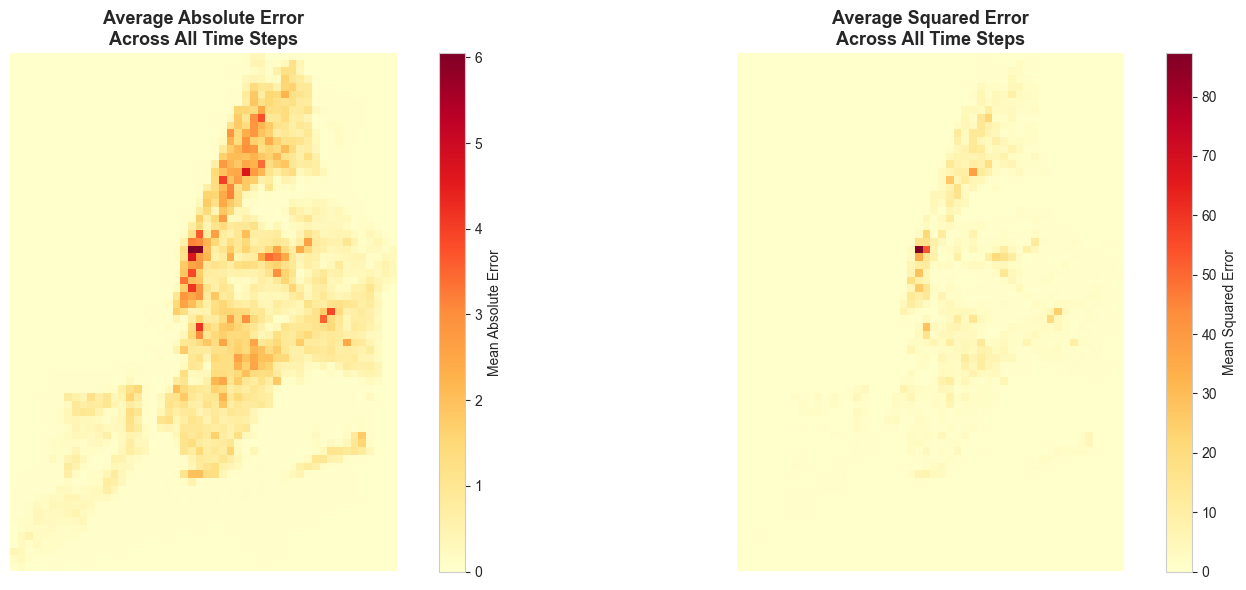


Spatial Error Statistics:
Maximum average absolute error: 6.0486
Minimum average absolute error: 0.0028
Mean average absolute error:    0.3147


In [7]:
# Calculate average error across all time steps for each spatial location
avg_absolute_error = np.mean(np.abs(test_actual[:, :, :, 0] - predictions[:, :, :, 0]), axis=0)
avg_squared_error = np.mean((test_actual[:, :, :, 0] - predictions[:, :, :, 0])**2, axis=0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Average absolute error
im1 = axes[0].imshow(avg_absolute_error, cmap='YlOrRd', interpolation='nearest')
axes[0].set_title('Average Absolute Error\nAcross All Time Steps', fontsize=13, fontweight='bold')
axes[0].axis('off')
plt.colorbar(im1, ax=axes[0], label='Mean Absolute Error')

# Average squared error
im2 = axes[1].imshow(avg_squared_error, cmap='YlOrRd', interpolation='nearest')
axes[1].set_title('Average Squared Error\nAcross All Time Steps', fontsize=13, fontweight='bold')
axes[1].axis('off')
plt.colorbar(im2, ax=axes[1], label='Mean Squared Error')

plt.tight_layout()
plt.savefig('CrimeNYC/plots/spatial_error_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nSpatial Error Statistics:")
print(f"Maximum average absolute error: {np.max(avg_absolute_error):.4f}")
print(f"Minimum average absolute error: {np.min(avg_absolute_error[avg_absolute_error > 0]):.4f}")
print(f"Mean average absolute error:    {np.mean(avg_absolute_error):.4f}")

## Total Crime Predictions Over Time

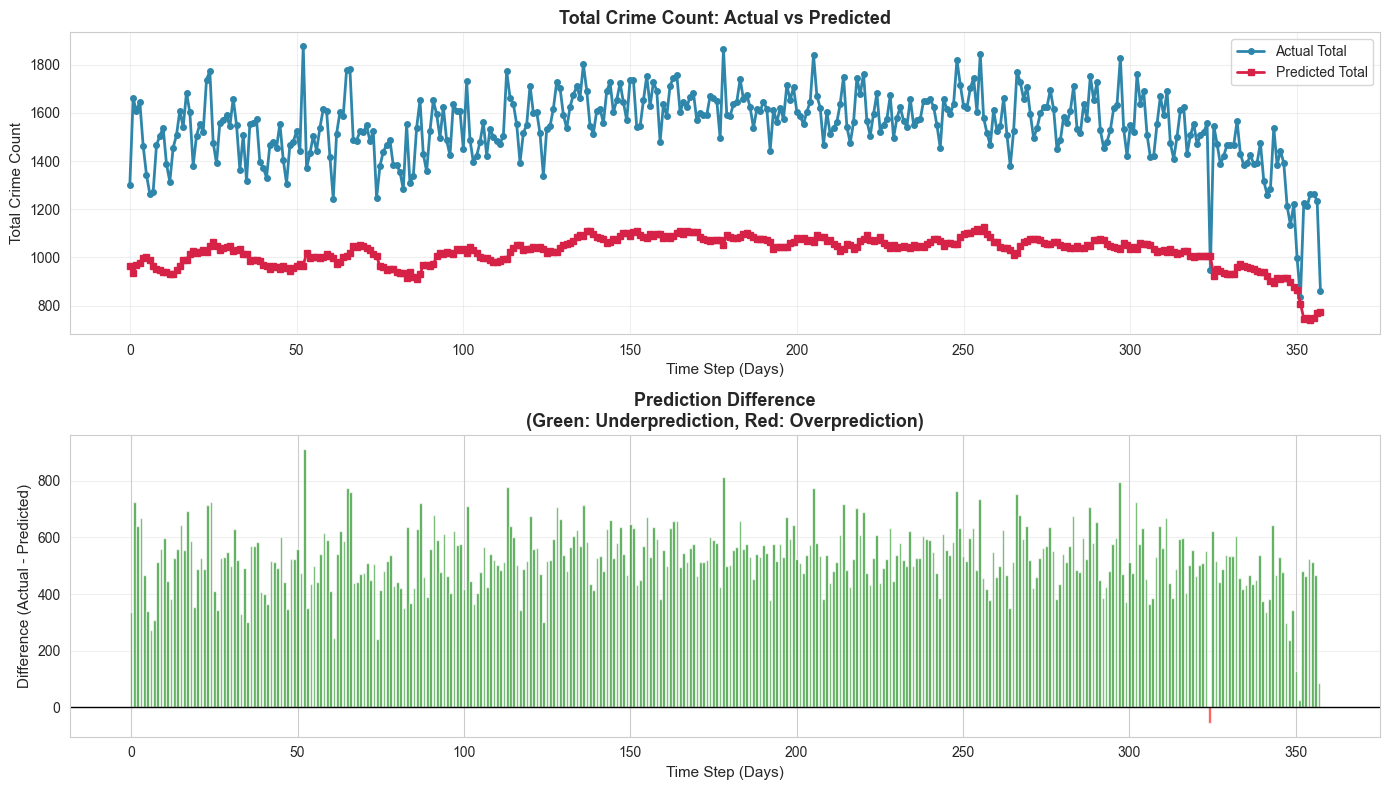


Total Crime Statistics:
Actual total crimes (all days):    553130
Predicted total crimes (all days): 366510
Difference:                        186620
Percentage difference:             33.74%


In [8]:
# Calculate total predicted vs actual crimes per time step
total_actual = test_actual.sum(axis=(1, 2, 3))
total_predicted = predictions.sum(axis=(1, 2, 3))

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot both on same graph
axes[0].plot(total_actual, label='Actual Total', color='#2E86AB', linewidth=2, marker='o', markersize=4)
axes[0].plot(total_predicted, label='Predicted Total', color='#D62246', linewidth=2, marker='s', markersize=4)
axes[0].set_xlabel('Time Step (Days)', fontsize=11)
axes[0].set_ylabel('Total Crime Count', fontsize=11)
axes[0].set_title('Total Crime Count: Actual vs Predicted', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot difference
difference = total_actual - total_predicted
axes[1].bar(range(len(difference)), difference, color=['green' if x >= 0 else 'red' for x in difference], alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1].set_xlabel('Time Step (Days)', fontsize=11)
axes[1].set_ylabel('Difference (Actual - Predicted)', fontsize=11)
axes[1].set_title('Prediction Difference\n(Green: Underprediction, Red: Overprediction)', 
                  fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('CrimeNYC/plots/total_crimes_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nTotal Crime Statistics:")
print(f"Actual total crimes (all days):    {total_actual.sum():.0f}")
print(f"Predicted total crimes (all days): {total_predicted.sum():.0f}")
print(f"Difference:                        {(total_actual.sum() - total_predicted.sum()):.0f}")
print(f"Percentage difference:             {((total_actual.sum() - total_predicted.sum()) / total_actual.sum() * 100):.2f}%")